# KARINA FRANCIELI SCHMIDT - 2023314

## Machine learning for business

### Lecturer: Dr. Muhammad Iqbal


 Imports libraries and modules needed to analyse data below

In [1]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler

Loading and naming dataset from CVS, which will make it ready for the analyses that will be done.

In [2]:
df = pd.read_csv("education.csv")

By calling df.head(), you will see a representation of the first few rows of the dataframe, which is useful for a quick initial inspection of the data and for understanding its structure. This can help you to check that the data has been loaded correctly and to get an idea of the types of data and columns present in the DataFrame.

In [3]:
df.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",...,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656",...,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",...,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


In [4]:
df.shape

(3283, 48)

With the code below we'll have information such as the data types of each column: the name of each column, the number of non-null values in each column and the data type of each column. This makes it possible to understand the data.








In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 48 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban Influence Code                                       

Count of null values in each column of the df DataFrame, which can be useful for identifying areas of missing data that need to be dealt with before further analysis.

In [6]:
# Missing value
valores_faltantes = df.isnull().sum()

print(valores_faltantes)

FIPS Code                                                                    0
State                                                                        0
Area name                                                                    0
2003 Rural-urban Continuum Code                                             62
2003 Urban Influence Code                                                   62
2013 Rural-urban Continuum Code                                             62
2013 Urban Influence Code                                                   62
City/Suburb/Town/Rural 2013                                                 62
Less than a high school diploma, 1970                                       97
High school diploma only, 1970                                              97
Some college (1-3 years), 1970                                              97
Four years of college or higher, 1970                                       97
Percent of adults with less than a high school diplo

 This code was used to replace missing values when reading the dataframe and to convert values into integers, ensuring that null values are handled correctly.

In [7]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("education.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan 

After executing the code, the missing values will be replaced by 0

In [8]:
df.fillna(0,inplace=True)

Below we can see that the missing values have been replaced correctly, with no more missing values.



In [9]:
# Missing value
valores_faltantes = df.isnull().sum()

print(valores_faltantes)

FIPS Code                                                                   0
State                                                                       0
Area name                                                                   0
2003 Rural-urban Continuum Code                                             0
2003 Urban Influence Code                                                   0
2013 Rural-urban Continuum Code                                             0
2013 Urban Influence Code                                                   0
City/Suburb/Town/Rural 2013                                                 0
Less than a high school diploma, 1970                                       0
High school diploma only, 1970                                              0
Some college (1-3 years), 1970                                              0
Four years of college or higher, 1970                                       0
Percent of adults with less than a high school diploma, 1970    

In [10]:
print(df.columns)

Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'City/Suburb/Town/Rural 2013',
       'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adu

I decided to rename it just to make the name of each column smaller.

In [11]:
df = df.rename(columns={'Percent of adults with a high school diploma only, 1970': 'HSD 1970' })
df = df.rename(columns={'Percent of adults with less than a high school diploma, 2015-19': 'HSD 2015-19' })

In [12]:
df.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19",HSD 2015-19,"Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",...,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656",...,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",...,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


Scatter plot to visualise the relationship between the two variables and identify possible patterns or correlations between them.

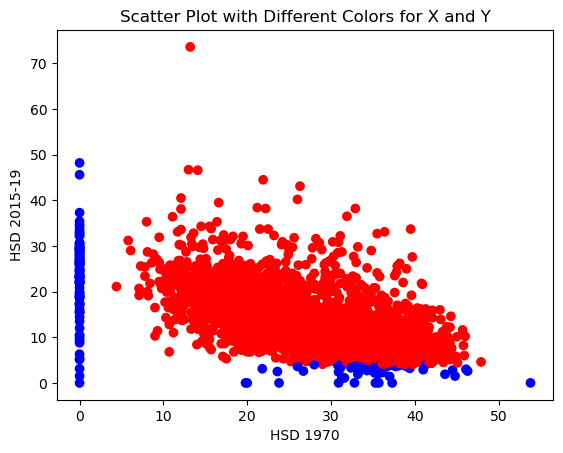

In [13]:
# Defining colors based on X and Y coordinates
colors = []
for index, row in df.iterrows():
    if row['HSD 1970'] > 3 and row['HSD 2015-19'] > 4:
        colors.append('red')
    else:
        colors.append('blue')
       

# Plotting points with different colors for X and Y
plt.scatter(df['HSD 1970'], df['HSD 2015-19'], c=colors)
plt.xlabel('HSD 1970')
plt.ylabel('HSD 2015-19')
plt.title('Scatter Plot with Different Colors for X and Y')
plt.show()


The elbow method is a common technique for determining the optimal number of clusters 

The basic idea behind the elbow method is to plot the number of clusters against the clustering evaluation metric on the x-axis. 

In [14]:
# Definir X e y
X = df['HSD 1970']
y = df['HSD 2015-19']  # Recursos

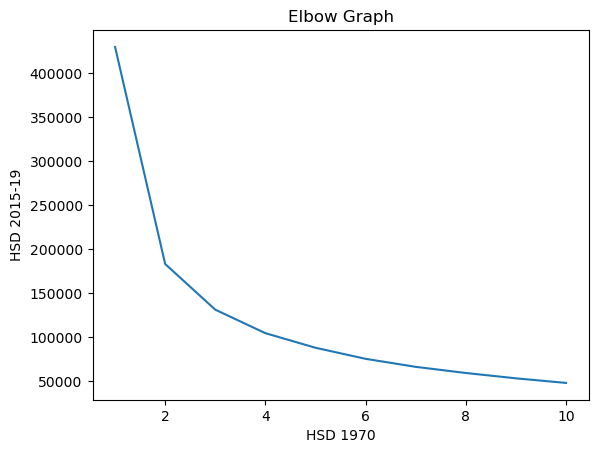

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'df' seja o seu DataFrame contendo os dados 'HSD 1970' e 'HSD 2015-19'

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=8, random_state=0)
    kmeans.fit(df[['HSD 1970', 'HSD 2015-19']])  # Use os dados reais do DataFrame
    wcss.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph')
plt.xlabel('HSD 1970')
plt.ylabel('HSD 2015-19')  # Within cluster sum of squares
plt.show()

In [16]:
df = pd.get_dummies(df)

# CLUSTERING

## KMeans

Considering the columns 'HSD 1970' and 'HSD 2015-19', to make KMeans to understand how the data was grouped by the clustering. 

In [17]:
from sklearn.cluster import KMeans

# Supposing 'df' is your DataFrame containing the data 'HSD 1970' and 'HSD 2015-19'

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=6, max_iter=300, n_init=8, random_state=0)

# Fit the model to your data and obtain cluster predictions
y_predicted = kmeans.fit_predict(df[['HSD 1970', 'HSD 2015-19']])

# Print the cluster predictions
print(y_predicted)

[2 5 5 ... 3 3 0]


Here we have added a new column called 'cluster' to the dataframe. The new column will be filled with the values contained in the y_predicted variable, which are the cluster predictions obtained from the clustering model (KMeans) applied earlier. Each value in y_predicted corresponds to the cluster assigned to each data instance.

In [18]:
df['cluster'] = y_predicted
df.head()

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970",HSD 1970,"Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980",...,"Bachelor's degree or higher, 2015-19_988","Bachelor's degree or higher, 2015-19_99,221","Bachelor's degree or higher, 2015-19_99,271","Bachelor's degree or higher, 2015-19_990","Bachelor's degree or higher, 2015-19_991","Bachelor's degree or higher, 2015-19_993","Bachelor's degree or higher, 2015-19_995","Bachelor's degree or higher, 2015-19_997","Bachelor's degree or higher, 2015-19_999",cluster
0,1007,1.0,1.0,1.0,1.0,73.1,19.4,3.3,4.2,59.5,...,0,0,0,0,0,0,0,0,0,2
1,1009,1.0,1.0,1.0,1.0,70.5,22.7,4.1,2.7,53.9,...,0,0,0,0,0,0,0,0,0,5
2,1021,1.0,1.0,1.0,1.0,73.2,20.0,3.8,3.0,54.0,...,0,0,0,0,0,0,0,0,0,5
3,1073,1.0,1.0,1.0,1.0,52.7,28.7,9.1,9.5,35.3,...,0,0,0,0,0,0,0,0,0,1
4,1115,1.0,1.0,1.0,1.0,68.8,23.6,4.4,3.1,50.1,...,0,0,0,0,0,0,0,0,0,5


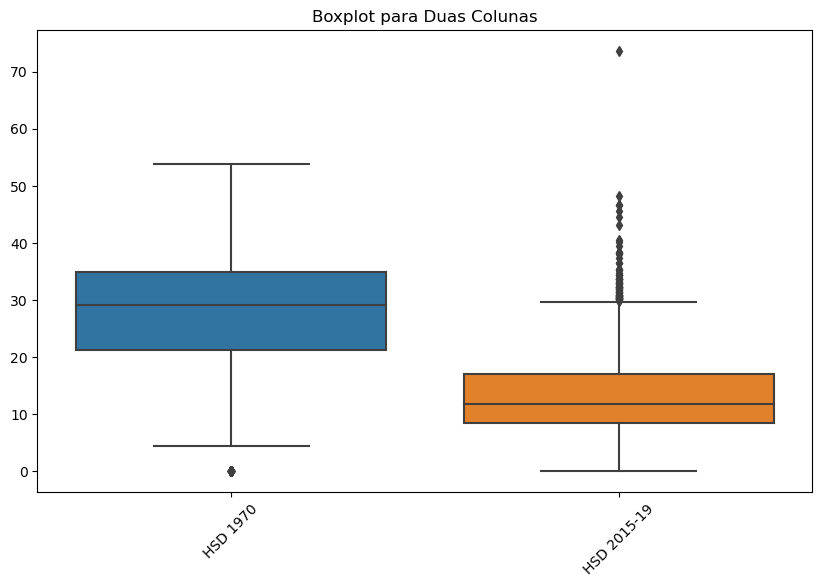

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame contendo os dados

# Boxplot para as duas colunas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['HSD 1970', 'HSD 2015-19']])
plt.title('Boxplot para Duas Colunas')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Definir X e y
X = df['HSD 1970']
y = df['HSD 2015-19']  # Recursos

In [21]:
#Import k-means
from sklearn.cluster import KMeans

In [22]:
# Converter a Series para um array NumPy e remodelar para duas dimensões
X_array = X.values.reshape(-1, 1)

In [23]:
# Algoritmo KMeans com 6 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_array)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 2])

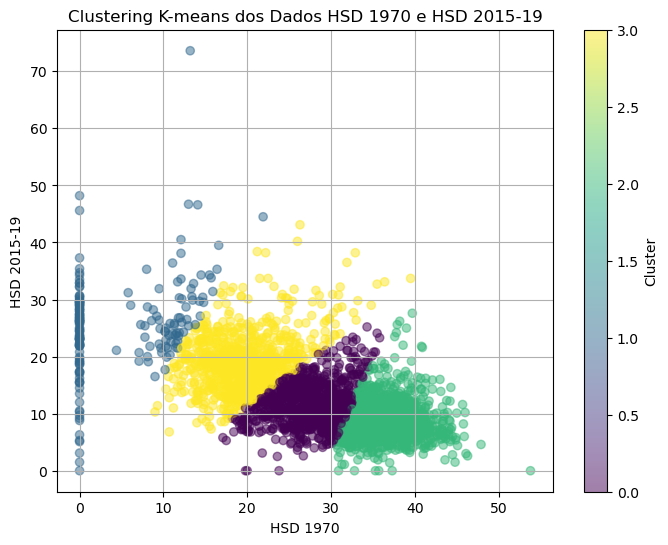

In [25]:
from sklearn.cluster import KMeans

# Inicializar o modelo KMeans com o número desejado de clusters
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=8, random_state=0)

# Ajustar o modelo aos seus dados
kmeans.fit(df[['HSD 1970', 'HSD 2015-19']])

# Obter as previsões dos clusters para os seus dados
y_predicted = kmeans.predict(df[['HSD 1970', 'HSD 2015-19']])

# Adicionar as previsões dos clusters como uma nova coluna em 'df'
df['Cluster'] = y_predicted

# Plotar o gráfico de dispersão com os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['HSD 1970'], df['HSD 2015-19'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering K-means dos Dados HSD 1970 e HSD 2015-19')
plt.xlabel('HSD 1970')
plt.ylabel('HSD 2015-19')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

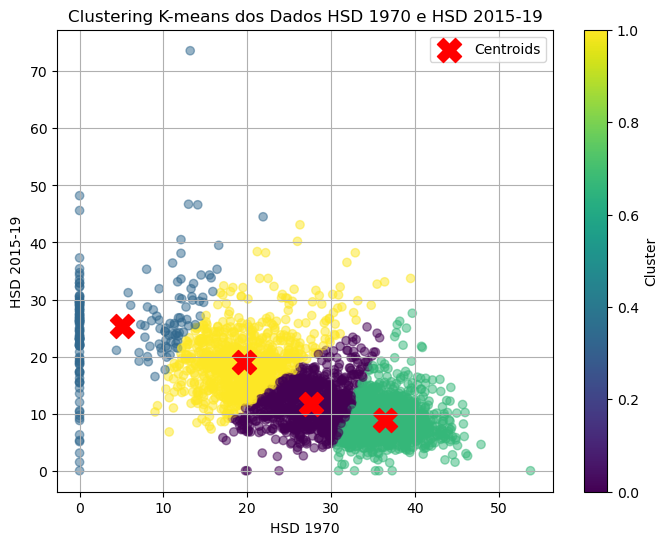

In [26]:
from sklearn.cluster import KMeans

# Inicializar o modelo KMeans com o número desejado de clusters
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=8, random_state=0)

# Ajustar o modelo aos seus dados
kmeans.fit(df[['HSD 1970', 'HSD 2015-19']])

# Obter as previsões dos clusters para os seus dados
y_predicted = kmeans.predict(df[['HSD 1970', 'HSD 2015-19']])

# Adicionar as previsões dos clusters como uma nova coluna em 'df'
df['Cluster'] = y_predicted

# Plotar o gráfico de dispersão com os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['HSD 1970'], df['HSD 2015-19'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering K-means dos Dados HSD 1970 e HSD 2015-19')
plt.xlabel('HSD 1970')
plt.ylabel('HSD 2015-19')

# Adicionar os centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.colorbar(label='Cluster')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suponha que 'dados' seja sua matriz de dados

# Lista para armazenar os valores de silhueta
silhouette_scores = []

# Teste diferentes números de clusters, de 2 a 10
for n_clusters in range(2, 11):
    # Inicialize o modelo KMeans com o número atual de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Ajuste o modelo aos dados
    cluster_labels = kmeans.fit_predict(df)
    # Calcule o coeficiente de silhueta médio para os clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

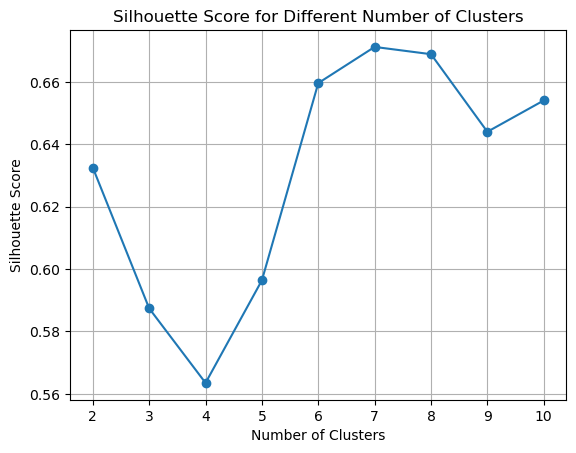

In [32]:
# Plotar o gráfico do coeficiente de silhueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

In [33]:
# Definir X e y
X = df['HSD 1970']
y = df['HSD 2015-19']  # Recursos

# Clustering KMedoid

In [34]:
# Install the scikit-learn-extra library before the execution of next cell
!pip install scikit-learn-extra

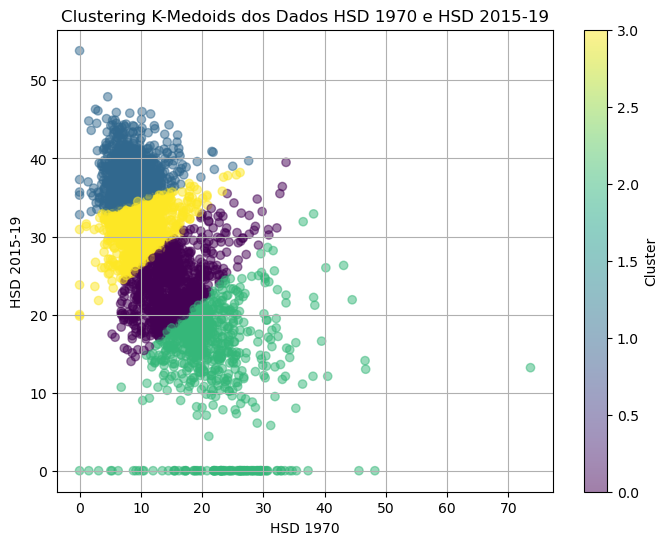

In [35]:
from sklearn_extra.cluster import KMedoids
# Store 'HSD 2015-19' and 'HSD 1970' from 'df'
D = df[['HSD 2015-19', 'HSD 1970']].values

# Initialise the number of clusters
cluster_num = 4

# Apply KMedoids
kmedoids = KMedoids(n_clusters=cluster_num, random_state=0)
clusters = kmedoids.fit_predict(D)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(D[:, 0], D[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clustering K-Medoids dos Dados HSD 1970 e HSD 2015-19')
plt.xlabel('HSD 1970')
plt.ylabel('HSD 2015-19')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [36]:
# Display the attributes Petal length and Petal width
print(D)

[[20.9 19.4]
 [19.5 22.7]
 [18.2 20. ]
 ...
 [ 7.8 34.8]
 [ 6.8 36.2]
 [23.5  0. ]]


# Comparision

In [37]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Function to perform hierarchical clustering and calculate metrics
def perform_clustering(n_clusters, df):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(df)
    db_index = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)
    return db_index, silhouette_avg

In [40]:
# Vary the number of clusters and store metrics
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, df)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

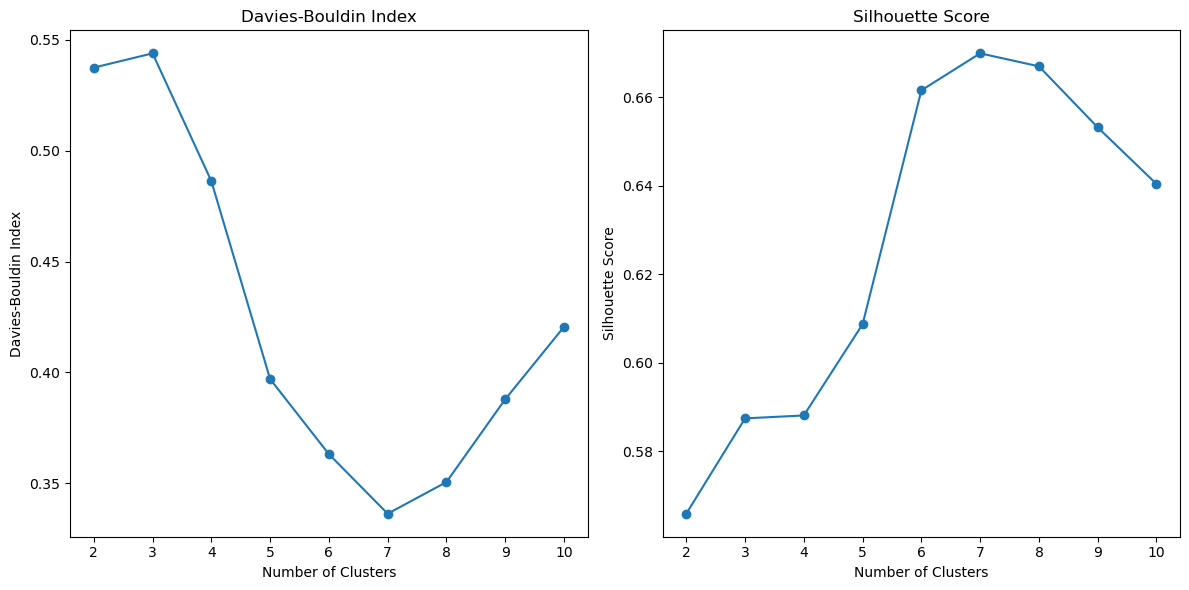

In [41]:
# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [42]:
# Choose the optimal number of clusters based on the metrics
optimal_clusters_db = np.argmin(db_scores) + 2  # +2 because the range starts from 2
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because the range starts from 2

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 7
Optimal Clusters (Silhouette): 7


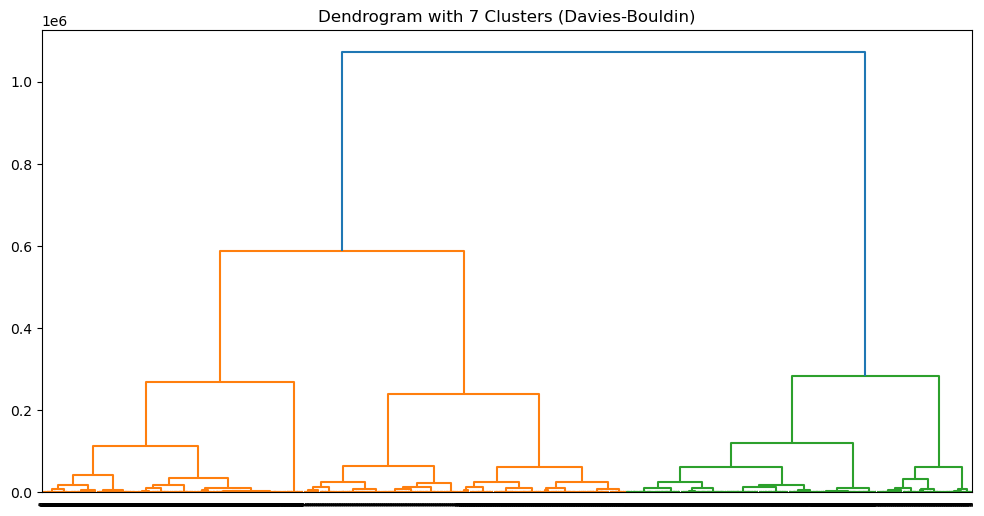

In [44]:
# Plot the dendrogram with the optimal number of clusters
optimal_agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_db)
optimal_labels = optimal_agg_clustering.fit_predict(df)
linkage_matrix_optimal = linkage(df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_optimal, orientation="top", labels=optimal_labels, distance_sort='descending')
plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

# TIME SERIES

 DBEREL02 - Household Electricity Consumption

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('DBEREL02.20240421124714.csv')

In [3]:
data.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03151V03803,Type of Dwelling,C03441V04150,Period of Construction,UNIT,VALUE
0,DBEREL02C01,Household Electricity Consumption,2015,2015,01,Apartment,011,1900-1966,Mean kilowatt-hours,3552.0
1,DBEREL02C01,Household Electricity Consumption,2015,2015,01,Apartment,091,1967-1999,Mean kilowatt-hours,4822.0
2,DBEREL02C01,Household Electricity Consumption,2015,2015,01,Apartment,03,2000-2004,Mean kilowatt-hours,5473.0
3,DBEREL02C01,Household Electricity Consumption,2015,2015,01,Apartment,113,2005-2022,Mean kilowatt-hours,5328.0
4,DBEREL02C01,Household Electricity Consumption,2015,2015,01,Apartment,-,All years of construction,Mean kilowatt-hours,5057.0


In [5]:
data.shape

(240, 10)

In [6]:
data = data.drop(columns=['STATISTIC'])

# Data visualization

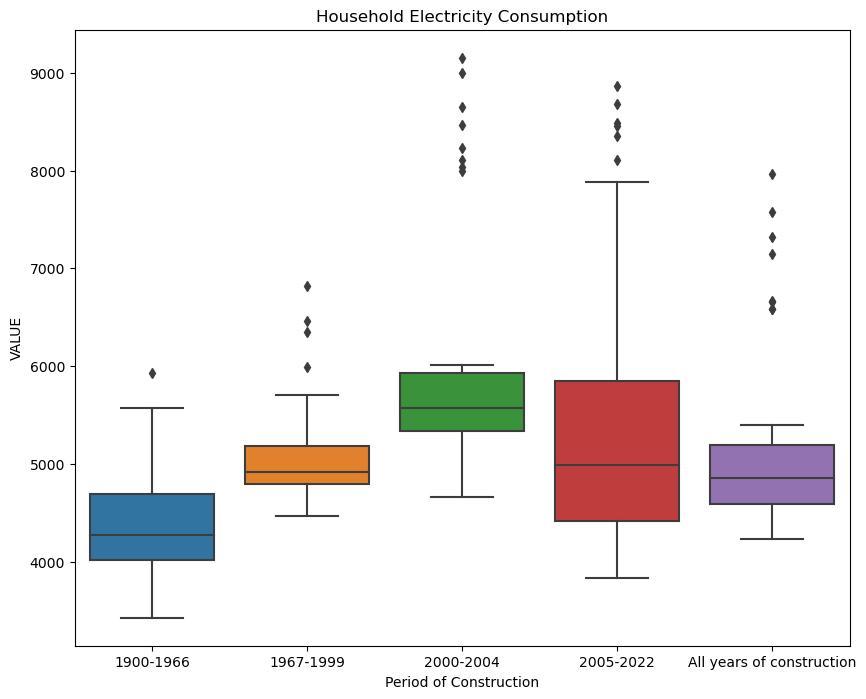

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seu código para carregar os dados e outras operações

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='Period of Construction', y='VALUE')
ax.set_title('Household Electricity Consumption')
plt.show()

<Figure size 1200x500 with 0 Axes>

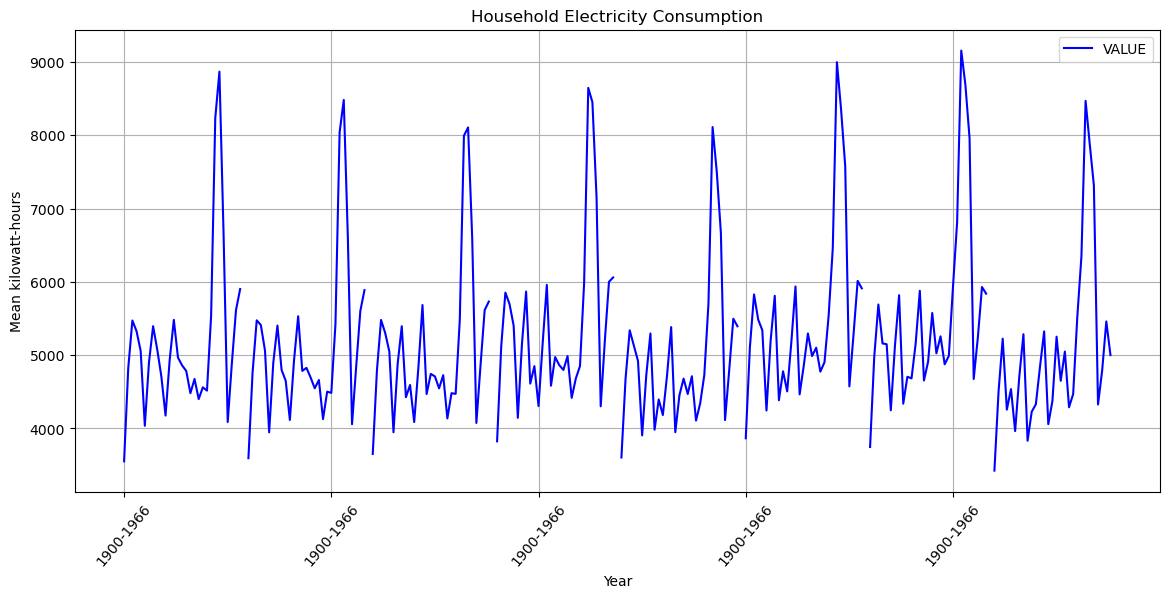

In [13]:
# Household Electricity Consumption
plt.figure(figsize=[12, 5]); # Set dimensions for figure
data.plot(x = 'Period of Construction', y = 'VALUE', figsize = (14, 6), color = 'b')   # 
plt.title('Household Electricity Consumption')
plt.ylabel('Mean kilowatt-hours')
plt.xlabel('Year')
plt.xticks(rotation = 50)
plt.grid(True)
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

# Remover linhas com valores ausentes
data_cleaned = data.dropna()

# Substituir valores infinitos por NaNs e, em seguida, remover linhas com NaNs
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cleaned.dropna(inplace=True)

# Realizar o teste ADF nos dados limpos
ad_fuller_result = adfuller(data_cleaned['VALUE'])

# Exibir o resultado do teste ADF
print(f'ADF Statistic: {ad_fuller_result[0]}')

ADF Statistic: -5.468059116505677


In [15]:
data['Electricity First Difference'] = data['VALUE'] - data['VALUE'].shift(1)
# Shift index by desired number of periods with an optional time `freq`.

# Show first five records
data.head()

,Statistic Label,TLIST(A1),Year,C03151V03803,Type of Dwelling,C03441V04150,Period of Construction,UNIT,VALUE,Electricity First Difference
0,Household Electricity Consumption,2015,2015,01,Apartment,011,1900-1966,Mean kilowatt-hours,3552.0,NaN
1,Household Electricity Consumption,2015,2015,01,Apartment,091,1967-1999,Mean kilowatt-hours,4822.0,1270.0
2,Household Electricity Consumption,2015,2015,01,Apartment,03,2000-2004,Mean kilowatt-hours,5473.0,651.0
3,Household Electricity Consumption,2015,2015,01,Apartment,113,2005-2022,Mean kilowatt-hours,5328.0,-145.0
4,Household Electricity Consumption,2015,2015,01,Apartment,-,All years of construction,Mean kilowatt-hours,5057.0,-271.0


In [16]:
# Drop NA values
data.dropna(subset = ["Electricity First Difference"], inplace = True)

# Show first five records
data.head()

,Statistic Label,TLIST(A1),Year,C03151V03803,Type of Dwelling,C03441V04150,Period of Construction,UNIT,VALUE,Electricity First Difference
1,Household Electricity Consumption,2015,2015,01,Apartment,091,1967-1999,Mean kilowatt-hours,4822.0,1270.0
2,Household Electricity Consumption,2015,2015,01,Apartment,03,2000-2004,Mean kilowatt-hours,5473.0,651.0
3,Household Electricity Consumption,2015,2015,01,Apartment,113,2005-2022,Mean kilowatt-hours,5328.0,-145.0
4,Household Electricity Consumption,2015,2015,01,Apartment,-,All years of construction,Mean kilowatt-hours,5057.0,-271.0
5,Household Electricity Consumption,2015,2015,11,Mid-terrace house,011,1900-1966,Mean kilowatt-hours,4036.0,-1021.0


In [17]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['Electricity First Difference'])

# Display the outcomes of Dicky Fuller test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.784278246755235
p-value: 5.041737485831914e-07


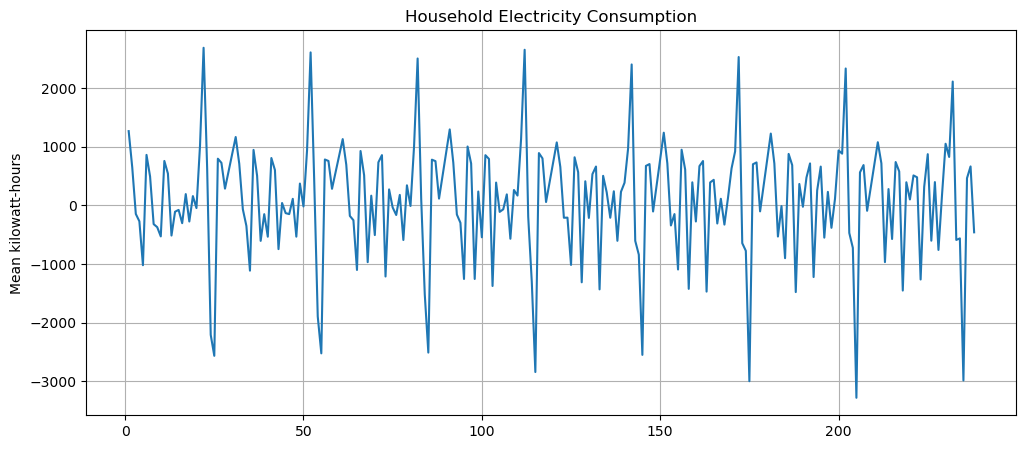

In [18]:
plt.figure(figsize = [12, 5]); # Set dimensions for figure
data['Electricity First Difference'].plot()
plt.title('Household Electricity Consumption')
plt.ylabel('Mean kilowatt-hours')
plt.grid(True)

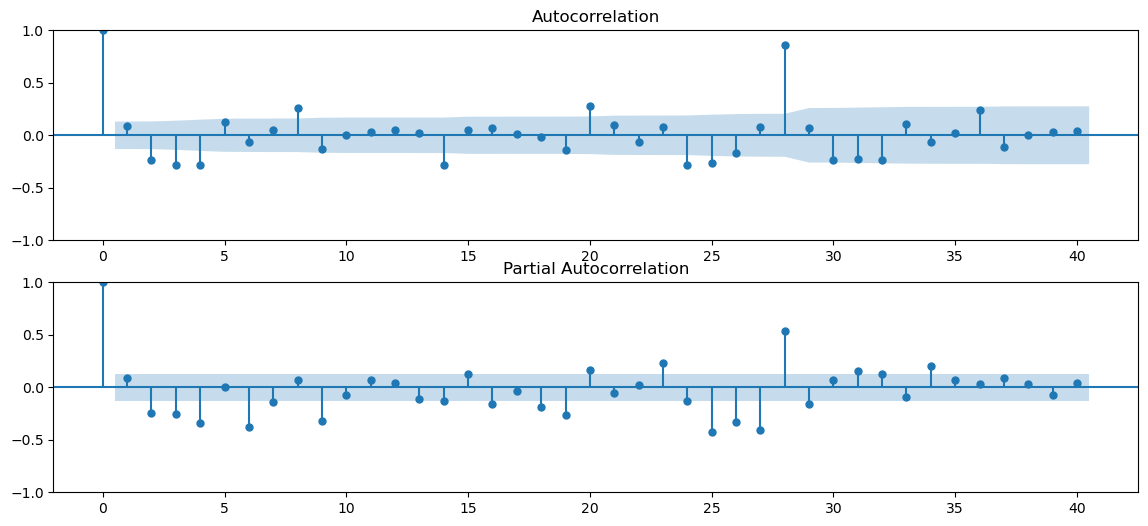

In [19]:
import statsmodels.api as sm
fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Electricity First Difference'].dropna(),lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Electricity First Difference'].dropna(),lags = 40,ax = ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(data['VALUE'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3710.2101438961627], [0, 1, 1, 3711.536513148177], [0, 1, 2, 3675.327614130082], [1, 1, 0, 3711.83898105205], [1, 1, 1, 3712.281033095714], [1, 1, 2, 3657.626746453122], [2, 1, 0, 3698.5009599921673], [2, 1, 1, 3652.971405264409], [2, 1, 2, 3654.9701301057544], [0, 2, 0, 3840.422666379501], [0, 2, 1, 3705.562793500557], [0, 2, 2, 3706.3136490204106], [1, 2, 0, 3815.0120512435033], [1, 2, 1, 3706.873037204613], [1, 2, 2, 3707.0165502148902], [2, 2, 0, 3800.3887923791945], [2, 2, 1, 3693.5463070423075], [2, 2, 2, 3706.651329812256]]


# SARIMA Mode

In [21]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(data['VALUE'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              VALUE   No. Observations:                  224
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1751.204
Date:                            Wed, 24 Apr 2024   AIC                           3520.408
Time:                                    22:55:39   BIC                           3550.575
Sample:                                         0   HQIC                          3532.602
                                            - 224                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8569      0.017     51.372      0.000       0.824       0.890
ar.L2         -0.9960      0.023   

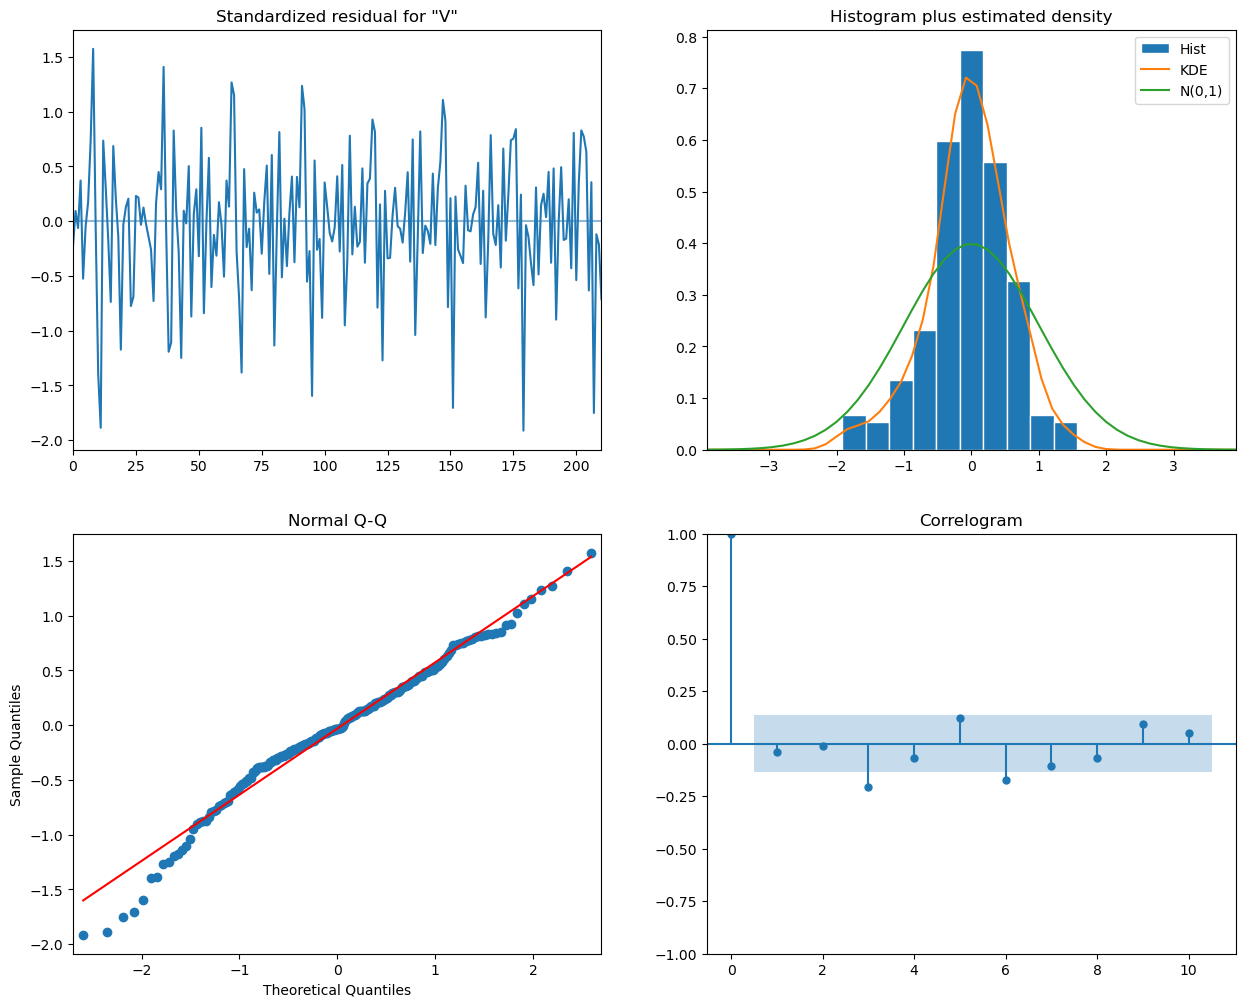

In [22]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

# Model Forecast

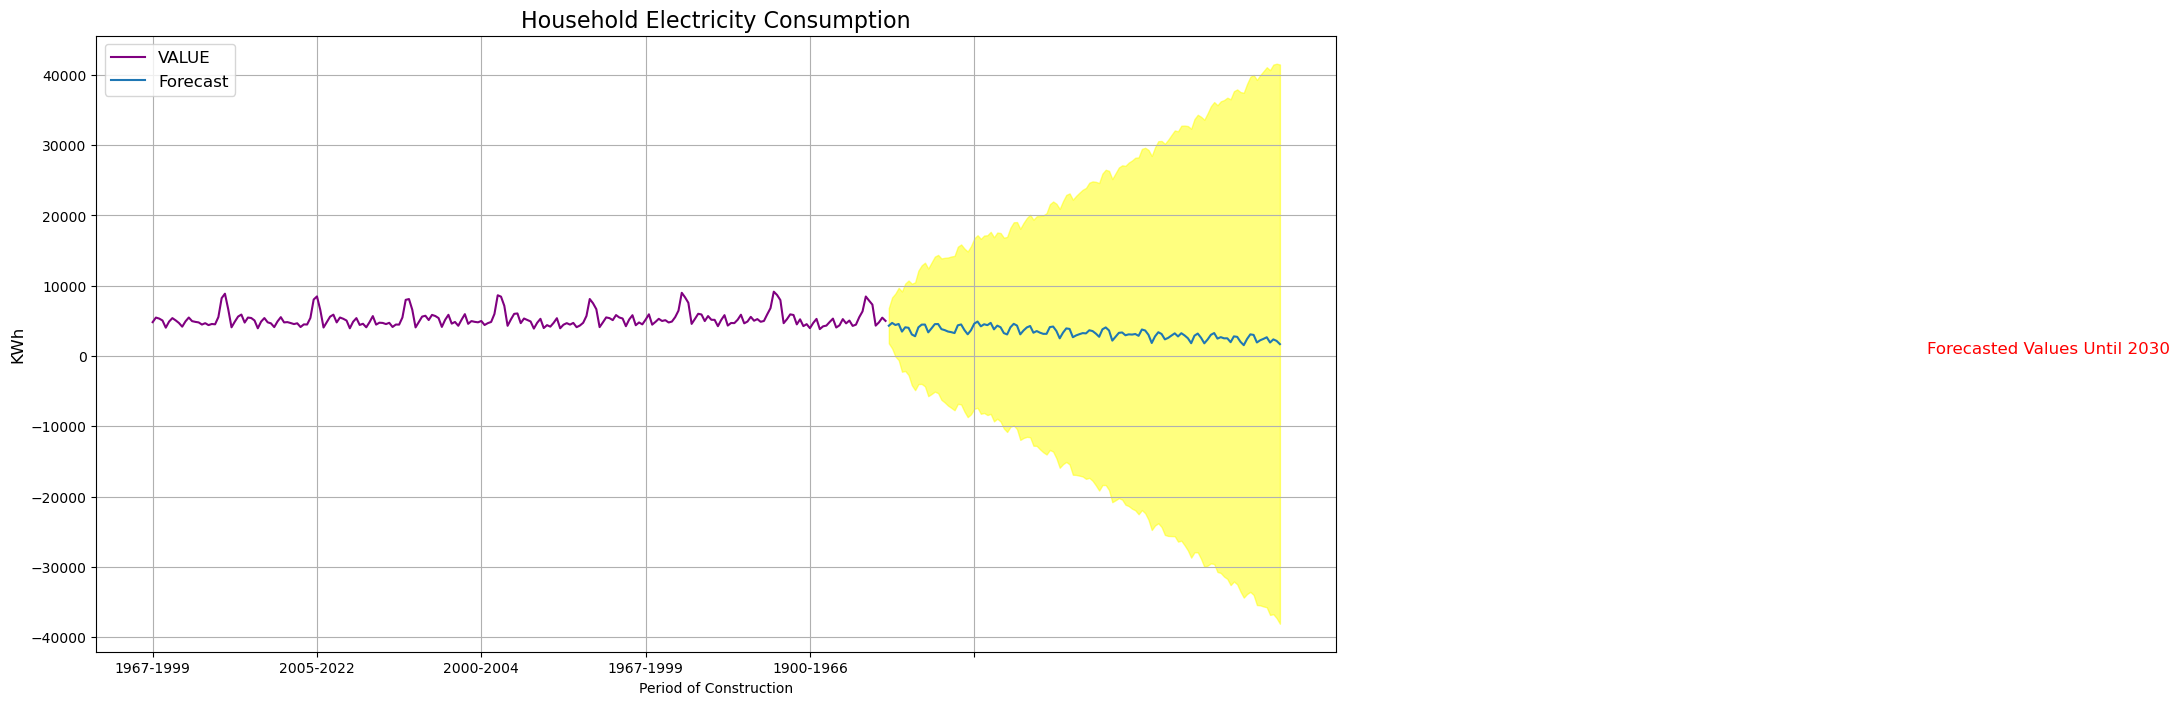

In [23]:
# Forecasting 3 years steps ahead
forecast_values = best_model.get_forecast(steps = 120)

# Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

# Plot the data
ax = data.plot(x = 'Period of Construction', y = 'VALUE', figsize = (14, 6), legend = True, color = 'purple')

# Plot the forecasted values 
forecast_values.predicted_mean.plot(ax = ax, label = 'Forecast', figsize = (16, 8), grid = True)

# Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color = 'yellow', alpha = .5)
plt.title('Household Electricity Consumption', size = 16)
plt.ylabel('KWh', size = 12)
plt.legend(loc = 'upper left', prop = {'size': 12})
ax.axes.get_xaxis().set_visible(True)
# annotation
ax.text(540, 400, 'Forecasted Values Until 2030', fontsize = 12,  color = 'red')
plt.show()

In [24]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = data[:int(0.85 * (len(data)))]
test  = data[int(0.85 * (len(data))):]

train.shape, test.shape

((190, 10), (34, 10))

In [25]:
train.head()

,Statistic Label,TLIST(A1),Year,C03151V03803,Type of Dwelling,C03441V04150,Period of Construction,UNIT,VALUE,Electricity First Difference
1,Household Electricity Consumption,2015,2015,01,Apartment,091,1967-1999,Mean kilowatt-hours,4822.0,1270.0
2,Household Electricity Consumption,2015,2015,01,Apartment,03,2000-2004,Mean kilowatt-hours,5473.0,651.0
3,Household Electricity Consumption,2015,2015,01,Apartment,113,2005-2022,Mean kilowatt-hours,5328.0,-145.0
4,Household Electricity Consumption,2015,2015,01,Apartment,-,All years of construction,Mean kilowatt-hours,5057.0,-271.0
5,Household Electricity Consumption,2015,2015,11,Mid-terrace house,011,1900-1966,Mean kilowatt-hours,4036.0,-1021.0


In [26]:
start = len(train)
end   = len(train) + len(test) - 1

print(start, end)

190 223


In [27]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

203    9471.673376
204    7648.921015
205    7128.281726
206    5286.737512
207    6114.309454
208    6330.194805
211    5253.966688
212    4829.171927
213    4879.844095
214    4351.528871
215    3642.222656
216    4658.511508
217    4708.202096
218    4318.108209
219    3609.644861
220    5482.622449
221    4855.347668
222    4690.338151
223    4278.610964
224    4579.220099
225    4994.308933
226    5200.948029
227    4014.408258
228    4978.898478
229    4020.744202
230    4458.954534
231    5361.280012
232    7656.259427
233    8691.900392
234    6859.936145
235    6572.965953
236    4945.782121
237    5733.964215
238    5914.730012
Name: SARIMA Predictions, dtype: float64


In [28]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Year'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Year'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Year'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Year'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Year'])
                                                               /np.abs(test['Year']))*100 
# Display the results
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,-9.412483e+07,3434.721731,1.367904e+07,3698.51882,169.889031
